Estrutura de Dados — Ordenação
==============================

Capítulos 3, 4, 7 e 8 do livro texto sugerido:
Introduction to Algorithms, Fourth Edition
By Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest and Clifford Stein
https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/

Conteúdo
========

A ordenação é a atividade de se organizar algo (tipicamente, valores ou registros) em uma ordem específica.

As ordens mais comuns encontradas nas aplicações típicas são ordenação crescente ou decrescente (crescente invertida).

O motivo disto é simples: é mais fácil tomar decisões sobre algo ordenado. Por exemplo, imagine um conjunto de cópias de ‘backup’. Qual cópia deve ser mantida em caso de falta de armazenamento?

A cópia mais recente, a mais antiga, ou uma intermediária?
A maior ou a menor cópia? As cópias com maiores diferenças (indicando versões diferentes)?

Em outras palavras, é possível se extrair informação sobre os dados a partir da mera ordenação dos mesmos.

Antes de entrarmos nos exemplos, um pré-âmbulo.

In [60]:
# Importanto biblioteca de geração de números aleatórios
# e medição de tempo
import copy
import random
import time

# Quantidade de números aleatórios por lista
numeros_aleatorios = [10, 20, 50, 100, 200, 500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 9000, 10000]

# Números aleatórios de referência
listas_aleatorias = [[random.randint(0, 10000) for _ in range(x)] for x in numeros_aleatorios]

# Ordenados em ordem crescente e decrescente
listas_ordenadas = [list(sorted(lista)) for lista in listas_aleatorias]
listas_invertidas = [list(reversed(lista)) for lista in listas_ordenadas]

# Funções para plotagem dos resultados
from matplotlib import pyplot as plt

# Função que executa diferentes algoritmos de ordenação
# para um mesmo conjunto de números aleatórios, permitindo
# a comparação do desempenho relativo entre eles
def medeTempoEPlota(funcoes, listas_de_numeros, titulo, log=False):
    for funcao in funcoes:
        y = []
        for i in range(len(listas_de_numeros)):
            t_inicio = time.time()
            if funcao(copy.copy(listas_de_numeros[i])) != listas_ordenadas[i]:
                raise Exception(f"Algo errado na implementação de {funcao.__name__}")
            t_fim = time.time()
            y.append(t_fim-t_inicio)
        plt.plot(numeros_aleatorios, y, label=funcao.__name__)
    plt.title(titulo)
    plt.ylabel("Segundos (s)")
    if log:
        plt.yscale("log")
    plt.xlabel("Número de elementos (n)")
    plt.legend()

Com o pré-âmbulo preparado, podemos partir para os algoritmos de ordenação.

O primeiro é nosso velho amigo, bubble sort.

### Bubble Sort

O bubble sort compara um elemento atual (endereçado por i) com todos os elementos futuros (endereçados por j), e troca os elementos (swap) sempre que o elemento em i é maior que o elemento em j.

[![](https://mermaid.ink/img/pako:eNo10LkKwzAMBuBXCZoTyH0NnTq2SzvKHUzsJIYcxXUoJeTd61ZIk_gkBPp36FaloYV-Wt_dKK0LLjexBL6MijF7RNHJqIQlwZQkZUkxIclYMsxJcpYcY5KCpcCCpGQpsSGpWCqsSGqWGmuShqXxl8UCIczaztIo_8j-mwlwo561gNa3kxlGJ0Ash1-Um1vvn6WD1tlNh7A9lXT6bORg5QxtL6eXV62MW-2VovkndHwBn11YlA?type=png)](https://mermaid.live/edit#pako:eNo10LkKwzAMBuBXCZoTyH0NnTq2SzvKHUzsJIYcxXUoJeTd61ZIk_gkBPp36FaloYV-Wt_dKK0LLjexBL6MijF7RNHJqIQlwZQkZUkxIclYMsxJcpYcY5KCpcCCpGQpsSGpWCqsSGqWGmuShqXxl8UCIczaztIo_8j-mwlwo561gNa3kxlGJ0Ash1-Um1vvn6WD1tlNh7A9lXT6bORg5QxtL6eXV62MW-2VovkndHwBn11YlA)

Na figura a seguir mostramos a tal bolha com i e j indicando os elementos

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWXFcrz-VzKJkLCfJo-QsIymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_23qCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf8_tcP8?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWXFcrz-VzKJkLCfJo-QsIymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_23qCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf8_tcP8)

Como `lista[i] > lista[j]`, substituímos os valores.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWX5crz-VzKJkrCDJo-QsIymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_23qCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf8_bcP8?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWX5crz-VzKJkrCDJo-QsIymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_23qCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf8_bcP8)

Incrementamos o `j` e checamos novamente.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWX5crz-VzKJkrCDJo-QsIymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_1vqCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf9BKcQA?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWX5crz-VzKJkrCDJo-QsIymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_1vqCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf9BKcQA)

Novamente, temos `lista[i] > lista[j]`, portanto substituímos os valores.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWXZcrz-VzKJkrCDJo-QsJymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_1vqCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf9AmcQA?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWXZcrz-VzKJkrCDJo-QsJymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_1vqCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf9AmcQA)

Incrementamos `j` e checamos novamente.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWXZcrz-VzKJkrCDJo-QsJymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_0nqCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf9CVcQE?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6Mwl8xCG5L3DYCRCB6fJ3IZRWJfsDlwnoZRMWXZcrz-VzKJkrCDJo-QsJymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC-9zFffn624jMnW9_2EhEtJZXFwyujkZ_vxYvVclr7g9_0nqCWsYEY7CyVDQveFObgRZ-TQheOkzqPjwPUjXBTeme8_PUDnrMcV-IsUDr-UCE-aoTuJ6RoUpXLG7inzZ_SPf9CVcQE)

Novamente, temos `lista[i] < lista[j]`, portanto incrementamos `j` sem substituir valores.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OQyeRiG4b3DYCRCB6fJ3IZRWJfsDlwnoZRMWXZcrz-VzKJkrCDJo-QsJymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC9v-V99f7biMiZb3_cTEi4llcXBKaOTn-3Hi9VzWfqC3_e7UUtYwYx2FkqGhO4Lc3AjzsihC-2kzqPjwPUjDArvzPefHqBz1uMK_EUKh19KhJNm6E5iugZFqZyxe8r8Gf3jH9EEcQI?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OQyeRiG4b3DYCRCB6fJ3IZRWJfsDlwnoZRMWXZcrz-VzKJkrCDJo-QsJymiFKwkKaOULCWpolSsItlE2bCWpI5Ss5qkidKwhqSN0obNXC9v-V99f7biMiZb3_cTEi4llcXBKaOTn-3Hi9VzWfqC3_e7UUtYwYx2FkqGhO4Lc3AjzsihC-2kzqPjwPUjDArvzPefHqBz1uMK_EUKh19KhJNm6E5iugZFqZyxe8r8Gf3jH9EEcQI)

Novamente, temos `lista[i] > lista[j]`, portanto substituímos os valores.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_fcqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9C8cQI?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_fcqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9C8cQI)

Incrementamos o `j` e checamos novamente. Temos `lista[i] < lista[j]`, portanto incrementamos `j` sem substituir valores.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_eUqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9ErcQM?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_eUqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9ErcQM)

Repetimos o mesmo.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_dMqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9GacQQ?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_dMqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9GacQQ)

Repetimos o mesmo.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_cEqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9IJcQU?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OSSeQjh5b3DYCRCB6fJ3IZRWJfsDlwnYZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oaEXC9n2a--P1txGZOt7_sJCZeRyuLglNHJz_bjxer5WfqC3_cEqCWsYEY7CyVDQ_eFObgRZ-TQheukzqPjwPUjPBTeme8_PUDnrMcV-IsUDr-UCJFm6E5iugZFqZyxe-r8Wf3jH9IJcQU)

De novo.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6MwleRiS4b3DYCRCB6fJ3IZRWJfsDlwnoZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oYNuV56uV99f7biMiZb3_cTEi4llcXBKaOTn-3Hi9XzsfQFv-__oZawghntLJQMCd0X5uBGnJFDF46TOo-OA9ePMCi8M99_eoDOWY8r8BcpHH4pEVaaoTuJ6RoUpXLG7inzZ_SPf9J4cQY?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6MwleRiS4b3DYCRCB6fJ3IZRWJfsDlwnoZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oYNuV56uV99f7biMiZb3_cTEi4llcXBKaOTn-3Hi9XzsfQFv-__oZawghntLJQMCd0X5uBGnJFDF46TOo-OA9ePMCi8M99_eoDOWY8r8BcpHH4pEVaaoTuJ6RoUpXLG7inzZ_SPf9J4cQY)

Até chegarmos ao fim da lista.

[![](https://mermaid.ink/img/pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OQyeRiG4b3DYCRCB6fJ3IZRWJfsDlwnoZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oYLuV7e8r_6_mzFZUy2vu8nJFxKKouDU0YnP9uPF6vnsvQFv-_bUUtYwYx2FkqGhO4Lc3AjzsihC-2kzqPjwPUjDArvzPefHqBz1uMK_EUKh19KhJNm6E5iugZFqZyxe8r8Gf3jH9LncQc?type=png)](https://mermaid.live/edit#pako:eNpN0E2LwjAQBuC_Uuas0E_7sbAH2aNe3L0lHtJmtFnaRGKCLOJ_39Qh6OQyeRiG4b3DYCRCB6fJ3IZRWJfsDlwnoZRMWXpcrz-VzKJkrCDJo-QsJymiFKwkKaOULCOpolSsItlE2bCWpI5Ss5qkidKwhqSN0oYLuV7e8r_6_mzFZUy2vu8nJFxKKouDU0YnP9uPF6vnsvQFv-_bUUtYwYx2FkqGhO4Lc3AjzsihC-2kzqPjwPUjDArvzPefHqBz1uMK_EUKh19KhJNm6E5iugZFqZyxe8r8Gf3jH9LncQc)

A partir daí, incrementamos o valor de `i` e repetimos o procedimento da bolha.

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSH25wBMOM-8DRiMRejjN5j5Owrrs_ZPrLETJDdt8r9d7JfMkOStJiiQFK0jKJCWrSKokFctJ6iQ1q0m2SbasI2mSNKwhaZO0rCXpknRhQq7jie-bH85WXKfs4IdhRsIYqSyOThmdfR12_6xel4u5vO6GWsIKFrSLUDI09IjMwU24IIc-XGd1nhwHrp_ho_DOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtBecQE?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSH25wBMOM-8DRiMRejjN5j5Owrrs_ZPrLETJDdt8r9d7JfMkOStJiiQFK0jKJCWrSKokFctJ6iQ1q0m2SbasI2mSNKwhaZO0rCXpknRhQq7jie-bH85WXKfs4IdhRsIYqSyOThmdfR12_6xel4u5vO6GWsIKFrSLUDI09IjMwU24IIc-XGd1nhwHrp_ho_DOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtBecQE)

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSH25wBMOM-8DRiMRejjN5j5Owrrs_ZPrLETJDdt8r9d7JfMkOStIiiQFK0nKJCWrSKokFctJ6iQ1q0m2SbasI2mSNKwhaZO0rCXpknRhQq7jie-bH85WXKfs4IdhRsIYqSyOThmdfR12_6xel4u5vO6GWsIKFrSLUDI09IjMwU24IIc-XGd1nhwHrp_ho_DOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtBMcQE?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSH25wBMOM-8DRiMRejjN5j5Owrrs_ZPrLETJDdt8r9d7JfMkOStIiiQFK0nKJCWrSKokFctJ6iQ1q0m2SbasI2mSNKwhaZO0rCXpknRhQq7jie-bH85WXKfs4IdhRsIYqSyOThmdfR12_6xel4u5vO6GWsIKFrSLUDI09IjMwU24IIc-XGd1nhwHrp_ho_DOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtBMcQE)

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSH25wBMOM-8DRiMRejjN5j5Owrrs_ZPrLETJDdt8r9d7JfMkOStIiiQFK0nKJCWrSKokFctJ6iQ1q0m2SbasI2mSNKwhaZO0rCXpknRhQq7jie-bH85WXKfs4IdhRsIYqSyOThmdfR12_6xel4u5vG6CWsIKFrSLUDI09IjMwU24IIc-XGd1nhwHrp_ho_DOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtC7cQI?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSH25wBMOM-8DRiMRejjN5j5Owrrs_ZPrLETJDdt8r9d7JfMkOStIiiQFK0nKJCWrSKokFctJ6iQ1q0m2SbasI2mSNKwhaZO0rCXpknRhQq7jie-bH85WXKfs4IdhRsIYqSyOThmdfR12_6xel4u5vG6CWsIKFrSLUDI09IjMwU24IIc-XGd1nhwHrp_ho_DOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtC7cQI)

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJclaQFEkKVpKUSUpWkVRJKpaT1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8pobtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtEqcQM?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJclaQFEkKVpKUSUpWkVRJKpaT1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8pobtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtEqcQM)

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8pobtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtD0cQM?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8pobtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtD0cQM)

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8poStYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtFjcQQ?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8poStYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtFjcQQ)

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8poJtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtHScQU?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8poJtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtHScQU)

[![](https://mermaid.ink/img/pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8poAtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtJBcQY?type=png)](https://mermaid.live/edit#pako:eNpN0E1vAiEQBuC_spmzJu6X-2HiwfTYXmpv0AO7jC5mFwxCTGP874VOSB0u8ITDO-8DRiMRejjN5j5Owrrs_ZPrLIySG7b5Xq_3SuZJcpaTFEkKVpKUSUpWkVRJKlaQ1ElqVpNsk2xZR9IkaVhD0iZpWUvSJelCQq7jie-bH85WXKfs4IdhRsI4UlkcnTI6-zrs_lm9Lhfn8poAtYQVLGgXoWRo6BGZg5twQQ59uM7qPDkOXD_DR-GdOf7oEXpnPa7AX6Vw-KZEiLRAfxLzLShK5Yz9oM7_qn_-AtJBcQY)

[![](https://mermaid.ink/img/pako:eNpN0MtqAyEUBuBXGc46gcwtcwlkEbpsN0132oUznmQMMxqMEkrIu1d7kOZ3ox-Cx_8Bo5EIPZxmcx8nYV32_sl1FqLkhm2-1-u9knmSnOUkRZKClSRlkpJVJFWSihUkdZKa1STbJFvWkTRJGtaQtEla1pJ0SbowIddxxfPND2crrlN28MMwI2GMVBZHp4zOvg67f1avn4u5vL6HWsIKFrSLUDI09IjMwU24IIc-bGd1nhwHrp_hovDOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtKwcQc?type=png)](https://mermaid.live/edit#pako:eNpN0MtqAyEUBuBXGc46gcwtcwlkEbpsN0132oUznmQMMxqMEkrIu1d7kOZ3ox-Cx_8Bo5EIPZxmcx8nYV32_sl1FqLkhm2-1-u9knmSnOUkRZKClSRlkpJVJFWSihUkdZKa1STbJFvWkTRJGtaQtEla1pJ0SbowIddxxfPND2crrlN28MMwI2GMVBZHp4zOvg67f1avn4u5vL6HWsIKFrSLUDI09IjMwU24IIc-bGd1nhwHrp_hovDOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtKwcQc)

[![](https://mermaid.ink/img/pako:eNpN0MtqAyEUBuBXGc46gcwtcwlkEbpsN0132oUznmQMMxqMEkrIu1d7kOZ3ox8ix_8Bo5EIPZxmcx8nYV32_sl1FqLkhm2-1-u9knmSnOUkRZKClSRlkpJVJFWSihUkdZKa1STbJFvWkTRJGtaQtEla1pJ0SbowIddxxfPND2crrlN28MMwI2GMVBZHp4zOvg67f1avn4u5vL6OWsIKFrSLUDI09IjMwU24IIc-bGd1nhwHrp_hovDOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtMfcQg?type=png)](https://mermaid.live/edit#pako:eNpN0MtqAyEUBuBXGc46gcwtcwlkEbpsN0132oUznmQMMxqMEkrIu1d7kOZ3ox8ix_8Bo5EIPZxmcx8nYV32_sl1FqLkhm2-1-u9knmSnOUkRZKClSRlkpJVJFWSihUkdZKa1STbJFvWkTRJGtaQtEla1pJ0SbowIddxxfPND2crrlN28MMwI2GMVBZHp4zOvg67f1avn4u5vL6OWsIKFrSLUDI09IjMwU24IIc-bGd1nhwHrp_hovDOHH_0CL2zHlfgr1I4fFMijLRAfxLzLShK5Yz9oM7_qn_-AtMfcQg)

[![](https://mermaid.ink/img/pako:eNpN0MtqAyEUBuBXGc46gcwtcyl0EbpsN0l3moUznmQsMxqMEkLIu1crh-Z3ox8ix_8Bo5EIPZxmcxsnYV32uec6C1FywzbH9fpdyZwkJylIClYmKUlKViWpSCpWJKlJalYn2ZJsWZekIWlYk6QlaVmbpCPpWH7kOq54vvrhbMVlynZ-GGZMGCOVxdEpo7Pv3ds_q9fPxfy8vo5awgoWtItQMjT0iMzBTbgghz5sZ3WeHAeun-Gi8M4c7nqE3lmPK_AXKRx-KBFGWqA_ifkaFKVyxn6lzv-qf_4C0o9xCA?type=png)](https://mermaid.live/edit#pako:eNpN0MtqAyEUBuBXGc46gcwtcyl0EbpsN0l3moUznmQsMxqMEkLIu1crh-Z3ox8ix_8Bo5EIPZxmcxsnYV32uec6C1FywzbH9fpdyZwkJylIClYmKUlKViWpSCpWJKlJalYn2ZJsWZekIWlYk6QlaVmbpCPpWH7kOq54vvrhbMVlynZ-GGZMGCOVxdEpo7Pv3ds_q9fPxfy8vo5awgoWtItQMjT0iMzBTbgghz5sZ3WeHAeun-Gi8M4c7nqE3lmPK_AXKRx-KBFGWqA_ifkaFKVyxn6lzv-qf_4C0o9xCA)

E repetimos até todos os elementos estarem ordenados.

In [61]:
sequencia_padrao = [3,2,1,4,0,5,9,7,8,0]

def bubbleSort(lista):
    for i in range(len(lista)):
        for j in range(i+1, len(lista)):
            if lista[i] > lista[j]:
                temp = lista[i]
                lista[i] = lista[j]
                lista[j] = temp
    return lista

print(sequencia_padrao)
print(bubbleSort(sequencia_padrao))

[3, 2, 1, 4, 0, 5, 9, 7, 8, 0]
[0, 0, 1, 2, 3, 4, 5, 7, 8, 9]


### Insertion Sort

O bubble-sort é extremamente ineficiente. Como pode ser visto nos diagramas, durante a ordenação, um dos primeiros elementos da lista ordenada `1` foi jogado no final da lista, sendo trocado pelo `0`.

Uma estratégia um pouco mais eficiente que o bubble sort é o insertion sort.

Nele, invés de substituirmos todos os valores, de maneira a termos sempre uma bolha ordenada, ignoramos a ordem local e obedecemos apenas a ordem global, o nosso objetivo.

Começamos comparando o elemento na posição `i` com todos os seus elementos futuros. O menor elemento encontrado substituirá o elemento em `i`, e o contador de `i` será incrementado.

Observe no diagrama.

[![](https://mermaid.ink/img/pako:eNpN0ctqAyEUBuBXkbOegHPLXEq6CNkU2k1butEszGgyhlGD41BKyLtXYyU9bvTj8KOeKwyGC-jhOJnvYWTWodd3qpEvyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0UboknU-mOqxwnpfDybLLiF70LKyT5s9DcWnFEAh9bp8eLO95-AHn_yA0T9n-7Zgoqb_YtCkzdN7gPWSghFVMcv9_19BGwY1CCQq9307yNDoKVN98I1uc-fjRA_TOLiKD5cKZEzvJ_IUV9Ec2zV4Fl87YtziR-2Buv49semE?type=png)](https://mermaid.live/edit#pako:eNpN0ctqAyEUBuBXkbOegHPLXEq6CNkU2k1butEszGgyhlGD41BKyLtXYyU9bvTj8KOeKwyGC-jhOJnvYWTWodd3qpEvyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0UboknU-mOqxwnpfDybLLiF70LKyT5s9DcWnFEAh9bp8eLO95-AHn_yA0T9n-7Zgoqb_YtCkzdN7gPWSghFVMcv9_19BGwY1CCQq9307yNDoKVN98I1uc-fjRA_TOLiKD5cKZEzvJ_IUV9Ec2zV4Fl87YtziR-2Buv49semE)

[![](https://mermaid.ink/img/pako:eNpN0U1rAyEQBuC_InPewH5mP0p6CLkU2ktbehlzMKvJGlY3uC6lhPz3aqyk40Ufhhd1rtBPXEAHx3H67gdmLHl9p5q4kjzFYr9aPUueRckwD5JHyTELUkQpsAxSRikxDVJFqbAKso6yxjZIHaXGOkgTpcEmSBuldclU--XP83I4GXYZyIuehbFy-nNfXBrReyKf26cHy3te-oDz_wcLzWO2sxSV1F9s3OQJOW-yPSSghFFMcvd_V99GwQ5CCQqd247yNFgKVN9cI1vs9PGje-isWUQCy4UzK3aSuQsr6I5snJ0KLu1k3sJE7oO5_QKP8Xpi?type=png)](https://mermaid.live/edit#pako:eNpN0U1rAyEQBuC_InPewH5mP0p6CLkU2ktbehlzMKvJGlY3uC6lhPz3aqyk40Ufhhd1rtBPXEAHx3H67gdmLHl9p5q4kjzFYr9aPUueRckwD5JHyTELUkQpsAxSRikxDVJFqbAKso6yxjZIHaXGOkgTpcEmSBuldclU--XP83I4GXYZyIuehbFy-nNfXBrReyKf26cHy3te-oDz_wcLzWO2sxSV1F9s3OQJOW-yPSSghFFMcvd_V99GwQ5CCQqd247yNFgKVN9cI1vs9PGje-isWUQCy4UzK3aSuQsr6I5snJ0KLu1k3sJE7oO5_QKP8Xpi)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPewD6zj5IeQi6F9tKWXsYczGqyhtUNrkspIf-9GivpeNGPYZhxrtBPXEAHx3H67gdmLHl9p5q4kDzFYr9aPUueRckwD5JHyTELUkQpsAxSRikxDVJFqbAKso6yxjZIHaXGOkgTpcEmSBuldZWp9se_5-VwMuwykBc9C2Pl9Oc-uDSi90Q-t08Plvd66QPO_8cTmsfabvYUldRfbNxkCTlv8j0koIRRTHL3f1efRsEOQgkKnbuO8jRYClTfXCJb7PTxo3vorFlEAsuFMyt2krmGFXRHNs5OBZd2Mm9hI_fF3H4BkHZ6Yw?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPewD6zj5IeQi6F9tKWXsYczGqyhtUNrkspIf-9GivpeNGPYZhxrtBPXEAHx3H67gdmLHl9p5q4kDzFYr9aPUueRckwD5JHyTELUkQpsAxSRikxDVJFqbAKso6yxjZIHaXGOkgTpcEmSBuldZWp9se_5-VwMuwykBc9C2Pl9Oc-uDSi90Q-t08Plvd66QPO_8cTmsfabvYUldRfbNxkCTlv8j0koIRRTHL3f1efRsEOQgkKnbuO8jRYClTfXCJb7PTxo3vorFlEAsuFMyt2krmGFXRHNs5OBZd2Mm9hI_fF3H4BkHZ6Yw)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPewD6zj5IeQi6F9tKWXsYczGqyhtUNrkspIf-9GivpeNGPYZhxrtBPXEAHx3H67gdmLHl9p5q4kDzFYr9aPUueRckwD5JHyTELUkQpsAxSRikxDVJFqbAKso6yxjZIHaXGOkgTpcEmSBuldZWp9se_5-VwMuwykBc9C2Pl9Oc-uDSi90Q-t08Plvd66QPO_4cRmsfabvYUldRfbNxkCTlv8j0koIRRTHL3f1efRsEOQgkKnbuO8jRYClTfXCJb7PTxo3vorFlEAsuFMyt2krmGFXRHNs5OBZd2Mm9hI_fF3H4BkQB6ZA?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPewD6zj5IeQi6F9tKWXsYczGqyhtUNrkspIf-9GivpeNGPYZhxrtBPXEAHx3H67gdmLHl9p5q4kDzFYr9aPUueRckwD5JHyTELUkQpsAxSRikxDVJFqbAKso6yxjZIHaXGOkgTpcEmSBuldZWp9se_5-VwMuwykBc9C2Pl9Oc-uDSi90Q-t08Plvd66QPO_4cRmsfabvYUldRfbNxkCTlv8j0koIRRTHL3f1efRsEOQgkKnbuO8jRYClTfXCJb7PTxo3vorFlEAsuFMyt2krmGFXRHNs5OBZd2Mm9hI_fF3H4BkQB6ZA)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_7cuNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-R7Hpm?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_7cuNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-R7Hpm)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_zcqNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-Sdnpn?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_zcqNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-Sdnpn)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_7clNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-TAHpo?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_7clNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-TAHpo)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_zchNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-Tinpp?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjGGacKwyGC-jhOJnvYWTWodd3qpEPyTEp96vVs-R5kpwUUYokBcmjlElKUkWpklQER6mT1KSOsk6yJl2UJklDmihtkpa0Ubokna9MdTjhPS-Hk2WXEb3oWVgnzZ-H4NKKIRD63D49WN7r4Qec_zchNE-1_eyYKKm_2LTBGTpvqj1koIRVTHL_f9eQRsGNQgkKvb9O8jQ6ClTffCJbnPn40QP0zi4ig-XCmRM7yXzDCvojm2avgktn7FvcyH0xt1-Tinpp)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjmFHnCoPhAno4TuZ7GJl16PWdauRDckzK_Wr1LHmeJCdFlCJJQfIoZZKSVFGqJBXBUeokNamjrJOsSRelSdKQJkqbpCVtlC5J5ytTHVY4z8vhZNllRC96FtZJ8-chuLRiCIQ-t08Plvd6-AHn_y2F5qm2fzsmSuovNm1whs6bag8ZKGEVk9z_3zWkUXCjUIJC77eTPI2OAtU3n8gWZz5-9AC9s4vIYLlw5sROMn9hBf2RTbNXwaUz9i1O5D6Y2y-UFHpq?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjmFHnCoPhAno4TuZ7GJl16PWdauRDckzK_Wr1LHmeJCdFlCJJQfIoZZKSVFGqJBXBUeokNamjrJOsSRelSdKQJkqbpCVtlC5J5ytTHVY4z8vhZNllRC96FtZJ8-chuLRiCIQ-t08Plvd6-AHn_y2F5qm2fzsmSuovNm1whs6bag8ZKGEVk9z_3zWkUXCjUIJC77eTPI2OAtU3n8gWZz5-9AC9s4vIYLlw5sROMn9hBf2RTbNXwaUz9i1O5D6Y2y-UFHpq)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjmFHnCoPhAno4TuZ7GJl16PWdauRDckzK_Wr1LHmeJCdFlCJJQfIoZZKSVFGqJBXBUeokNamjrJOsSRelSdKQJkqbpCVtlC5J5ytTHVY4z8vhZNllRC96FtZJ8-chuLRiCIQ-t08Plvd6-AHn_w2E5qm2fzsmSuovNm1whs6bag8ZKGEVk9z_3zWkUXCjUIJC77eTPI2OAtU3n8gWZz5-9AC9s4vIYLlw5sROMn9hBf2RTbNXwaUz9i1O5D6Y2y-Unnpr?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPegPvKPkp6CLkU2ktbetEczGqyhlWD61JKyH-vxko6XvRjmFHnCoPhAno4TuZ7GJl16PWdauRDckzK_Wr1LHmeJCdFlCJJQfIoZZKSVFGqJBXBUeokNamjrJOsSRelSdKQJkqbpCVtlC5J5ytTHVY4z8vhZNllRC96FtZJ8-chuLRiCIQ-t08Plvd6-AHn_w2E5qm2fzsmSuovNm1whs6bag8ZKGEVk9z_3zWkUXCjUIJC77eTPI2OAtU3n8gWZz5-9AC9s4vIYLlw5sROMn9hBf2RTbNXwaUz9i1O5D6Y2y-Unnpr)

E finalmente fazemos a substituíção do `3 (i=0)` pelo `0 (j=4)`. Em seguida, recomeçamos do `i=1`.

[![](https://mermaid.ink/img/pako:eNpN0U1PAyEQBuC_Qua8Tfaz-2HqwXgx0YsaL9ADLrRLs0DDsjGm6X8XxIl9ucCTCRmYC4xWSBjgMNuvceLOk-dXZkiIEjnN95vNvRIFSkHLJCVKSYskFUpF6yQ1Sk2rJA1KQ5skW5Qt7ZO0KC1tk3QoHe2S9Ch96JCZuOJ5WT-Pjp8n8mQW6byyfx4jlJNjJPL-cPfP6vZ9MadbkEbg3cFyqpX54POuzMhpV-whAy2d5kqE_7vEMgZ-kloyGMJ2VsfJM2DmGgr56u3btxlh8G6VGaxnwb18VDw0rGE48HkJKoXy1r2kifwO5voDj7R6Yw?type=png)](https://mermaid.live/edit#pako:eNpN0U1PAyEQBuC_Qua8Tfaz-2HqwXgx0YsaL9ADLrRLs0DDsjGm6X8XxIl9ucCTCRmYC4xWSBjgMNuvceLOk-dXZkiIEjnN95vNvRIFSkHLJCVKSYskFUpF6yQ1Sk2rJA1KQ5skW5Qt7ZO0KC1tk3QoHe2S9Ch96JCZuOJ5WT-Pjp8n8mQW6byyfx4jlJNjJPL-cPfP6vZ9MadbkEbg3cFyqpX54POuzMhpV-whAy2d5kqE_7vEMgZ-kloyGMJ2VsfJM2DmGgr56u3btxlh8G6VGaxnwb18VDw0rGE48HkJKoXy1r2kifwO5voDj7R6Yw)

[![](https://mermaid.ink/img/pako:eNpN0UtrAyEQAOC_InPewD6zj5IeSi-F9tKWXjQHu5qsYdXgupQS8t-rtUMzXpyPQWacC4xWSBjgMNuvceLOk-dXZkgIJXKa7zebeyUKlIKWSUqUkhZJKpSK1klqlJpWSRqUhjZJtihb2idpUVraJulQOtol6VH60CEz8cR8WT-Pjp8n8mQW6byyfx5DKCfHSOT94e6f1e18MU6340kj8O1QlFOtzAefd0VGTrtyDxlo6TRXIvzfJZYx8JPUksEQrrM6Tp4BM9dQyFdv377NCIN3q8xgPQvu5aPioWENw4HPS1AplLfuJW3kdzHXH5A5emQ?type=png)](https://mermaid.live/edit#pako:eNpN0UtrAyEQAOC_InPewD6zj5IeSi-F9tKWXjQHu5qsYdXgupQS8t-rtUMzXpyPQWacC4xWSBjgMNuvceLOk-dXZkgIJXKa7zebeyUKlIKWSUqUkhZJKpSK1klqlJpWSRqUhjZJtihb2idpUVraJulQOtol6VH60CEz8cR8WT-Pjp8n8mQW6byyfx5DKCfHSOT94e6f1e18MU6340kj8O1QlFOtzAefd0VGTrtyDxlo6TRXIvzfJZYx8JPUksEQrrM6Tp4BM9dQyFdv377NCIN3q8xgPQvu5aPioWENw4HPS1AplLfuJW3kdzHXH5A5emQ)

E repetiremos o procedimento até alcançar o próximo mínimo global.

[![](https://mermaid.ink/img/pako:eNpN0UtPAyEQAOC_Qua8TfbZfZh6MF5M9KLGC_SAC-3SLNCwbIxp-t8FcWKHC3yZMANzgdEKCQMcZvs1Ttx58vzKDAmhRE7z_WZzr0SBUtAySYlS0iJJhVLROkmNUtMqSYPS0CbJFmVL-yQtSkvbJB1KR7skPUofOmQmrnhe1s-j4-eJPJlFOq_sn8cQyskxEnl_uPtndfu-GKfbAtIIvDsk5VQr88HnXZ6R067fQwZaOs2VCP93iWkM_CS1ZDCE7ayOk2fAzDUk8tXbt28zwuDdKjNYz4J7-ah4aFjDcODzElQK5a17SRP5Hcz1B5ZkenE?type=png)](https://mermaid.live/edit#pako:eNpN0UtPAyEQAOC_Qua8TfbZfZh6MF5M9KLGC_SAC-3SLNCwbIxp-t8FcWKHC3yZMANzgdEKCQMcZvs1Ttx58vzKDAmhRE7z_WZzr0SBUtAySYlS0iJJhVLROkmNUtMqSYPS0CbJFmVL-yQtSkvbJB1KR7skPUofOmQmrnhe1s-j4-eJPJlFOq_sn8cQyskxEnl_uPtndfu-GKfbAtIIvDsk5VQr88HnXZ6R067fQwZaOs2VCP93iWkM_CS1ZDCE7ayOk2fAzDUk8tXbt28zwuDdKjNYz4J7-ah4aFjDcODzElQK5a17SRP5Hcz1B5ZkenE)

Fazemos a substituição do `2` pelo `0`, retornamos para `i=2` e reiniciamos a busca pelo mínimo global.

[![](https://mermaid.ink/img/pako:eNpN0U1rAyEQBuC_InPewH5mP0p6KLkE2ktbetE92NVkDbsaXJdSQv57tXZoXi_6MIjjXGEwQkIHx8l8DSO3jjy_Mk18lEhp2m82j0pkKBlKjpLTLEqBUtAySolS0iJKhVLRKsoWZUvbKDVKTesoDUpDmygtSkvznumwwnlZP0-WX0Zy0Iu0Tpk_DxHKyiEQeX96-Gd1303I-R6kFni37z2ls9IffNplCTnv8h4SmKWduRL-_66hjIEb5SwZdH47qdPoGDB984V8debtWw_QObvKBNaL4E7uFfcPnqE78mnxKoVyxr7EifwO5vYDj7R6ZQ?type=png)](https://mermaid.live/edit#pako:eNpN0U1rAyEQBuC_InPewH5mP0p6KLkE2ktbetE92NVkDbsaXJdSQv57tXZoXi_6MIjjXGEwQkIHx8l8DSO3jjy_Mk18lEhp2m82j0pkKBlKjpLTLEqBUtAySolS0iJKhVLRKsoWZUvbKDVKTesoDUpDmygtSkvznumwwnlZP0-WX0Zy0Iu0Tpk_DxHKyiEQeX96-Gd1303I-R6kFni37z2ls9IffNplCTnv8h4SmKWduRL-_66hjIEb5SwZdH47qdPoGDB984V8debtWw_QObvKBNaL4E7uFfcPnqE78mnxKoVyxr7EifwO5vYDj7R6ZQ)

Repetimos o procedimento até chegar no elemento final. Descobrimos que o elemento em `i=2` já era o mínimo global.

[![](https://mermaid.ink/img/pako:eNpN0TtvwyAQAOC_gm52JD_jR5UOVZZI7dJWXcADNSQmsiHCWFUV5b8XSk_NscCnE8dxVxiMkNDBcTJfw8itI8-vTBMfSqQ07TebRyUylAwlR8lpFqVAKWgZpUQpaRGlQqloFWWLsqVtlBqlpnWUBqWhTZQWpaV5z3RY4bysnyfLLyM56EVap8yfhxDKyiEQeX96-Gd1302I830BqQXe7XtP6az0B592WULOu7yHBGZpZ66E_79rSGPgRjlLBp3fTuo0OgZM33wiX515-9YDdM6uMoH1IriTe8X9g2fojnxavEqhnLEvcSK_g7n9AJN6emw?type=png)](https://mermaid.live/edit#pako:eNpN0TtvwyAQAOC_gm52JD_jR5UOVZZI7dJWXcADNSQmsiHCWFUV5b8XSk_NscCnE8dxVxiMkNDBcTJfw8itI8-vTBMfSqQ07TebRyUylAwlR8lpFqVAKWgZpUQpaRGlQqloFWWLsqVtlBqlpnWUBqWhTZQWpaV5z3RY4bysnyfLLyM56EVap8yfhxDKyiEQeX96-Gd1302I830BqQXe7XtP6az0B592WULOu7yHBGZpZ66E_79rSGPgRjlLBp3fTuo0OgZM33wiX515-9YDdM6uMoH1IriTe8X9g2fojnxavEqhnLEvcSK_g7n9AJN6emw)

Incrementamos o `i` e repetimos o procedimento.

[![](https://mermaid.ink/img/pako:eNpN0U1rAyEQBuC_ssx5A_uZ_SjpoeQSaC9t6UX3YFeTNawaXJdSQv57tXZoXi_6MMjoXGE0XEAPx9l8jROzLnl-pTrxkTwj2bDZPEqeo-QoBUpB8iglSkmqKBVKRcooNUpN6ihblC3pojQoDWmitCgtaaN0KB0pBqrDCudl_TxZdpmSg16EddL8eQiXVoyBkvenh3-W972HnO9BaI53-7dnREn9weZdlSbnXTlACkpYxST3_3cNZRTcJJSg0PvtLE-To0D1zRey1Zm3bz1C7-wqUlgvnDmxl8w3rKA_snnxKrh0xr7EifwO5vYDkoR6aw?type=png)](https://mermaid.live/edit#pako:eNpN0U1rAyEQBuC_ssx5A_uZ_SjpoeQSaC9t6UX3YFeTNawaXJdSQv57tXZoXi_6MMjoXGE0XEAPx9l8jROzLnl-pTrxkTwj2bDZPEqeo-QoBUpB8iglSkmqKBVKRcooNUpN6ihblC3pojQoDWmitCgtaaN0KB0pBqrDCudl_TxZdpmSg16EddL8eQiXVoyBkvenh3-W972HnO9BaI53-7dnREn9weZdlSbnXTlACkpYxST3_3cNZRTcJJSg0PvtLE-To0D1zRey1Zm3bz1C7-wqUlgvnDmxl8w3rKA_snnxKrh0xr7EifwO5vYDkoR6aw)

Ao final, temos a lista ordenada.

In [62]:
sequencia_padrao = [3,2,1,4,0,5,9,7,8,0]

def insertionSort(lista):
    for i in range(len(lista)):
        min_val = lista[i]
        min_j = i
        for j in range(i+1, len(lista)):
            if lista[j] < min_val:
                min_j = j
                min_val = lista[j]

        temp = lista[i]
        lista[i] = lista[min_j]
        lista[min_j] = temp
    return lista

print(sequencia_padrao)
print(insertionSort(sequencia_padrao))

[3, 2, 1, 4, 0, 5, 9, 7, 8, 0]
[0, 0, 1, 2, 3, 4, 5, 7, 8, 9]


### Merge Sort

O algoritmo do merge sort funciona a partir do particionamento da lista de entrada, até que seja encontrada uma lista trivialmente ordenável.

Observe no diagrama:


[![](https://mermaid.ink/img/pako:eNpd0LkOwjAMBuBXqTyDRC96DEywwQKjwxAaQyP1gDQRQoh3J2CFgUzWpyS2_yc0oyKo4dyN96aVxkbbvRgifyZ3uhh5baPNdHNklGTWaoHpcT5faRUHiTFhSYIkGLOkQVLMWDIWGtRfn7U2pO2vTYYLfpAHyTFnWQZZYsVSBCmwYCmDlFiyVEEq__NvCJhBT6aXWvkUnh8WYFvqSUDty05fWitADC9_UTo7Hh5DA7U1jmbgrkpaWmvpF-ihPstu8kpK29HsONdvvK83vbVsVA?type=png)](https://mermaid.live/edit#pako:eNpd0LkOwjAMBuBXqTyDRC96DEywwQKjwxAaQyP1gDQRQoh3J2CFgUzWpyS2_yc0oyKo4dyN96aVxkbbvRgifyZ3uhh5baPNdHNklGTWaoHpcT5faRUHiTFhSYIkGLOkQVLMWDIWGtRfn7U2pO2vTYYLfpAHyTFnWQZZYsVSBCmwYCmDlFiyVEEq__NvCJhBT6aXWvkUnh8WYFvqSUDty05fWitADC9_UTo7Hh5DA7U1jmbgrkpaWmvpF-ihPstu8kpK29HsONdvvK83vbVsVA)

E continuamos a particionar recursivamente até chegar às ordenações triviais.
[![](https://mermaid.ink/img/pako:eNpl0TtvwyAQB_CvYt2cSH7E8WPo5G7J0o5HBmpIjGRDgrGqKsp37zkn1KplQOjHH47HHXqnNLRwHt1nP0gfksNbIuy8fFy8vA7JwcxB4rM_CauM130wzlJK2ITaTzDF1_m2aK_W4Dr1P2xUisVpu30xKouSYc6SR8kxYymiFLhj2bFoq_5U71LsqJwJsThlMeVFZZQSS5Z9lD02LFWUCiuWOkqNNUsTpaGdfx2EOtjApP0kjaKnvK9zAsKgJy2gpeFoLkMQIOyDgnIJ7v3L9tAGv-gNLFclg-6MpJtM0J7lOJNqZYLzR_6c5x89vgELUYTf?type=png)](https://mermaid.live/edit#pako:eNpl0TtvwyAQB_CvYt2cSH7E8WPo5G7J0o5HBmpIjGRDgrGqKsp37zkn1KplQOjHH47HHXqnNLRwHt1nP0gfksNbIuy8fFy8vA7JwcxB4rM_CauM130wzlJK2ITaTzDF1_m2aK_W4Dr1P2xUisVpu30xKouSYc6SR8kxYymiFLhj2bFoq_5U71LsqJwJsThlMeVFZZQSS5Z9lD02LFWUCiuWOkqNNUsTpaGdfx2EOtjApP0kjaKnvK9zAsKgJy2gpeFoLkMQIOyDgnIJ7v3L9tAGv-gNLFclg-6MpJtM0J7lOJNqZYLzR_6c5x89vgELUYTf)

[![](https://mermaid.ink/img/pako:eNp9kj2PwjAMhv9K5RmkftKPgals3HKMDkOuCTRSm3BpqhNC_PdLiaJKpXcZrOjxm9e24gc0inGo4NKpn6al2gTHz4DIYfy6anprg6MYDMVXPBPJhOaNEUpaFZGBPbMwxMPwPXLNJuGU-k8cHZZqwUJMztvtXrDIkwhjR2JHuGRvRjXWto4ws0-MkXuVeJJg6ki68Hk3rMOF35xZ6znF0DlnnmSYObLzZIelI_mfRVemyDF3rwpPCiwcKT0pbfW1iWyADfRc91Qw-7mPKUfAtLznBCp77cS1NQSIfFohHY063WUDldEj38B4Y9TwWlDbXQ_VhXaDpZwJo_SHW5fX1jx_AfERs8k?type=png)](https://mermaid.live/edit#pako:eNp9kj2PwjAMhv9K5RmkftKPgals3HKMDkOuCTRSm3BpqhNC_PdLiaJKpXcZrOjxm9e24gc0inGo4NKpn6al2gTHz4DIYfy6anprg6MYDMVXPBPJhOaNEUpaFZGBPbMwxMPwPXLNJuGU-k8cHZZqwUJMztvtXrDIkwhjR2JHuGRvRjXWto4ws0-MkXuVeJJg6ki68Hk3rMOF35xZ6znF0DlnnmSYObLzZIelI_mfRVemyDF3rwpPCiwcKT0pbfW1iWyADfRc91Qw-7mPKUfAtLznBCp77cS1NQSIfFohHY063WUDldEj38B4Y9TwWlDbXQ_VhXaDpZwJo_SHW5fX1jx_AfERs8k)

[![](https://mermaid.ink/img/pako:eNqFkstugzAQRX8FzTqReIbHoiuySzbpcpyFi51gCUxqbFVVlH-viYWQgCYsLHTvPTNja-5QdYxDAZem-6lqqrR3OHlE9ubrquit9g6i1xSf55lIJhSvtOikTRHp2W8K-rjvvw1XbAgO1qtwsJ-nJy9ceIL5GJ232w_BAqdwyRZYiaXtKPREBRg6KpxRK3iwxEMMHB6NSoSxU-K3BUt_Vm9yXly-XLt8jL7rmoxKgolTdv-2X3mOHeaOSt9Pv_IcKaYOz0Ylw8wp-ajkdtS14vaADbRctVQwu273wSOga95yAoX9bcS11gSIfNggNbr7_JUVFFoZvgFzY1TzUlA7XQvFhTa9VTkTulNHt8DPPX78ATMK4rc?type=png)](https://mermaid.live/edit#pako:eNqFkstugzAQRX8FzTqReIbHoiuySzbpcpyFi51gCUxqbFVVlH-viYWQgCYsLHTvPTNja-5QdYxDAZem-6lqqrR3OHlE9ubrquit9g6i1xSf55lIJhSvtOikTRHp2W8K-rjvvw1XbAgO1qtwsJ-nJy9ceIL5GJ232w_BAqdwyRZYiaXtKPREBRg6KpxRK3iwxEMMHB6NSoSxU-K3BUt_Vm9yXly-XLt8jL7rmoxKgolTdv-2X3mOHeaOSt9Pv_IcKaYOz0Ylw8wp-ajkdtS14vaADbRctVQwu273wSOga95yAoX9bcS11gSIfNggNbr7_JUVFFoZvgFzY1TzUlA7XQvFhTa9VTkTulNHt8DPPX78ATMK4rc)

Uma lista com um único elemento, já está ordenado. Com dois elementos, basta trocá-los de ordem.
Fazemos as ordenações triviais.
[![](https://mermaid.ink/img/pako:eNqFkstugzAQRX8FzTqReIbHoiuySzftcszCxU6wBCY1tqoqyr_XxEJIQBMWFrr3nhl7NDeoe8ahgHPb_9QNVdo7fXhEDubroui18U5i0BQfZ0UkE4rXWvTSpoj07DcHfTwO34YrNgZH61k4OC7TsxeuPMF8DKv9_k2wwClcshVWYmk7Cj1TAUaOChfUBh6s8RADh0eTEqHvlPhlwdJf1JudJ48vtx4fY-y6JpOSYOKUw7_tN8ZxwNxR6evbb4wjxdTh2aRk0zjySckxq7aK2wN20HHVUcHsut1Gj4BueMcJFPa3FZdGEyDyboPU6P7zV9ZQaGX4DsyVUc1LQe3tOijOtB2sypnQvXp3C_zY4_sfMGzitw?type=png)](https://mermaid.live/edit#pako:eNqFkstugzAQRX8FzTqReIbHoiuySzftcszCxU6wBCY1tqoqyr_XxEJIQBMWFrr3nhl7NDeoe8ahgHPb_9QNVdo7fXhEDubroui18U5i0BQfZ0UkE4rXWvTSpoj07DcHfTwO34YrNgZH61k4OC7TsxeuPMF8DKv9_k2wwClcshVWYmk7Cj1TAUaOChfUBh6s8RADh0eTEqHvlPhlwdJf1JudJ48vtx4fY-y6JpOSYOKUw7_tN8ZxwNxR6evbb4wjxdTh2aRk0zjySckxq7aK2wN20HHVUcHsut1Gj4BueMcJFPa3FZdGEyDyboPU6P7zV9ZQaGX4DsyVUc1LQe3tOijOtB2sypnQvXp3C_zY4_sfMGzitw)

Depois remontamos recursivamente as sequências ordenadas consumindo os primeiros elementos de cada sublista ordenada (esquerda e direita).

[![](https://mermaid.ink/img/pako:eNp9kk1vwyAMhv9K5HMr5bP5OPSU3rrLdjQ5sEAbpAQ6QjRNVf_7SBGKlGbjYKHHL69t4Tu0inGo4NKr77aj2gTn94DIcfq8anrrgrMYDcVnbIhkQvPWCCWtisjAnkUY4mn8mrhms3BO_SeOTmu1YCFGzX5_FCzyJMLYkdgRLtmLUY21rSPM4hNj4l4lniQYOpKufF4N63Dlt2S2ek4xdc6ZJxlmjhw8OWDuSP5n0Y0pcizdq8KTwk9RelJi0WxNZAPsYOB6oILZz73POQKm4wMnUNlrL66dIUDkwwrpZNTHj2yhMnriO5hujBpeC2q7G6C60H60lDNhlH5z6_Lcmscv7h2zyQ?type=png)](https://mermaid.live/edit#pako:eNp9kk1vwyAMhv9K5HMr5bP5OPSU3rrLdjQ5sEAbpAQ6QjRNVf_7SBGKlGbjYKHHL69t4Tu0inGo4NKr77aj2gTn94DIcfq8anrrgrMYDcVnbIhkQvPWCCWtisjAnkUY4mn8mrhms3BO_SeOTmu1YCFGzX5_FCzyJMLYkdgRLtmLUY21rSPM4hNj4l4lniQYOpKufF4N63Dlt2S2ek4xdc6ZJxlmjhw8OWDuSP5n0Y0pcizdq8KTwk9RelJi0WxNZAPsYOB6oILZz73POQKm4wMnUNlrL66dIUDkwwrpZNTHj2yhMnriO5hujBpeC2q7G6C60H60lDNhlH5z6_Lcmscv7h2zyQ)

Executamos a junção das metades recursivamente.

[![](https://mermaid.ink/img/pako:eNpl0TtvwyAQB_CvYt2cSH7E8WPo5G7p0o6HB2ouMZINKT6rqqJ89-Ig1KplQOh3f3Q8bjBYRdDCebKfwygdJ6fXRJhlfb84eR2Tk15Y4mPuhVHa0cDaGp8SJvHjJ5ji8_KxklNbcCv9D2uVYtrv909aZVEyzILkUXLMgxRRCiyCHIKQUX-6dyl2vp3m2Nxn8RA2lVHK2PwY5YhlkCpKhVWQOkqNdZAmSoNN_-sgfoIdzORmqZV_yttWE8AjzSSg9ctJX0YWIMzdB-XK9u3LDNCyW2kH61VJpk5Lf5MZ2rOcFq-kNFv3Ej7n8Uf3bweJhN8?type=png)](https://mermaid.live/edit#pako:eNpl0TtvwyAQB_CvYt2cSH7E8WPo5G7p0o6HB2ouMZINKT6rqqJ89-Ig1KplQOh3f3Q8bjBYRdDCebKfwygdJ6fXRJhlfb84eR2Tk15Y4mPuhVHa0cDaGp8SJvHjJ5ji8_KxklNbcCv9D2uVYtrv909aZVEyzILkUXLMgxRRCiyCHIKQUX-6dyl2vp3m2Nxn8RA2lVHK2PwY5YhlkCpKhVWQOkqNdZAmSoNN_-sgfoIdzORmqZV_yttWE8AjzSSg9ctJX0YWIMzdB-XK9u3LDNCyW2kH61VJpk5Lf5MZ2rOcFq-kNFv3Ej7n8Uf3bweJhN8)

Finalmente, juntamos as duas últimas metades para obter a lista final ordenada.

[![](https://mermaid.ink/img/pako:eNpl0LtuwzAMBdBfMTgngJ-x4yFTRndpRyqDajGxAJsKZBlFEeTfq0TgVA0UcXAX3geMzhD0cJ3dzzhpH7LhM1O8bt83r-9TNtg1aHzPi2JjPY3BOo4pxVl8_8WaI-aX_f5kTS6SixQiBRZJSpESyySVSIVVklqkxjpJI9Jgk-QgcsA2SSvSYpekE-nwGK9RTGxen2LYwUJ-0dbELh6vmIIw0UIK-rjO9jYFBYqfMai34L5-eYQ--I12sN2NDnS2Oja2QH_V8xqVjA3Of6R23yU__wBaZXEU?type=png)](https://mermaid.live/edit#pako:eNpl0LtuwzAMBdBfMTgngJ-x4yFTRndpRyqDajGxAJsKZBlFEeTfq0TgVA0UcXAX3geMzhD0cJ3dzzhpH7LhM1O8bt83r-9TNtg1aHzPi2JjPY3BOo4pxVl8_8WaI-aX_f5kTS6SixQiBRZJSpESyySVSIVVklqkxjpJI9Jgk-QgcsA2SSvSYpekE-nwGK9RTGxen2LYwUJ-0dbELh6vmIIw0UIK-rjO9jYFBYqfMai34L5-eYQ--I12sN2NDnS2Oja2QH_V8xqVjA3Of6R23yU__wBaZXEU)

In [63]:
# Um algoritmo estável em todos os casos
sequencia_padrao = [3,2,1,4,0,5,9,7,8,0]

def mergeSort(lista):
    # Se só tem um elemento, já está ordenada
    if len(lista) <= 1:
        return lista
    # Se tem dois elementos, comparação é trivial
    if len(lista) == 2:
        if lista[0] > lista[1]:
            return [lista[1], lista[0]]
        else:
            return lista
    metade = len(lista)//2
    metadeEsquerdaOrdenada = mergeSort(lista[:metade])
    metadeDireitaOrdenada = mergeSort(lista[metade:])
    # Junta metades
    listaFinal = []
    while True:
        if metadeEsquerdaOrdenada and not metadeDireitaOrdenada:
            listaFinal.extend(metadeEsquerdaOrdenada)
            break
        elif not metadeEsquerdaOrdenada and metadeDireitaOrdenada:
            listaFinal.extend(metadeDireitaOrdenada)
            break
        else:
            if metadeEsquerdaOrdenada[0] < metadeDireitaOrdenada[0]:
                listaFinal.append(metadeEsquerdaOrdenada[0])
                metadeEsquerdaOrdenada.pop(0)
            else:
                listaFinal.append(metadeDireitaOrdenada[0])
                metadeDireitaOrdenada.pop(0)
    return listaFinal

print(sequencia_padrao)
print(mergeSort(sequencia_padrao))

[3, 2, 1, 4, 0, 5, 9, 7, 8, 0]
[0, 0, 1, 2, 3, 4, 5, 7, 8, 9]


### Quick Sort

Um novo algoritmo que não havíamos visto é o quick sort.

O seu princípio também é dividir-para-conquistar, assim como no merge sort.

A grande diferença é que invés de remontarmos sublistas ordenadas recursivamente, como no merge sort,
é que no quick sort fazemos ordenações parciais referentes a um pivô escolhido.

Tudo que for menor ou igual que o pivô escolhido, fica à esquerda do pivô.
Tudo que for maior que o pivô escolhido, fica à direita do pivô.

[![](https://mermaid.ink/img/pako:eNpl0UtqwzAQBuCrmFknEL_ix6KrLlMozXLkhWop8YAtBVluCCG3yg16sSpSFQqVQAwfv95X6LWQ0MJh1Od-4MYmu4-EqXn5PBp-GpIdzZajHzumBBnZW9LKpZhKXPsvJDaYd-v1C4k0SopZkCxKhmmQPEqORZAiSoGbLtTP47zTl0Y3fN-7mCqx_K2lEs-pfqXyb8bLNsoWmyBVlAqrIHWUGusgTZTGn8jv8-iwgkmaiZNwL3h9hBjYQU6SQevKkY6DZcDUzQX5YvX-onporVnkCpaT4Fa-EncXm6A98HF2KgVZbd7Cn_ivuf0AdZaCGg?type=png)](https://mermaid.live/edit#pako:eNpl0UtqwzAQBuCrmFknEL_ix6KrLlMozXLkhWop8YAtBVluCCG3yg16sSpSFQqVQAwfv95X6LWQ0MJh1Od-4MYmu4-EqXn5PBp-GpIdzZajHzumBBnZW9LKpZhKXPsvJDaYd-v1C4k0SopZkCxKhmmQPEqORZAiSoGbLtTP47zTl0Y3fN-7mCqx_K2lEs-pfqXyb8bLNsoWmyBVlAqrIHWUGusgTZTGn8jv8-iwgkmaiZNwL3h9hBjYQU6SQevKkY6DZcDUzQX5YvX-onporVnkCpaT4Fa-EncXm6A98HF2KgVZbd7Cn_ivuf0AdZaCGg)

Checamos elemento a elemento

`3<5`, fica onde está.

`2<5`, fica onde está.

`1<5`, fica onde está.

`4<5`, fica onde está.

`0<5`, fica onde está.

`9>5`, fica onde está.

`7>5`, fica onde está.

`9>5`, fica onde está.

`0<5`, vai para o lado esquerdo.

[![](https://mermaid.ink/img/pako:eNpl0UtqwzAQBuCrmFkn4GfseNFVlymUdDnyQrWUeMCWgiynlJBb9Qa9WBWpMoXKIIZPvzyydYNeCwktnEb90Q_c2ORwTJial_ez4ZchOdBsOfq5Y0qQkb0lrVyKqcSN_0IixaLbbp9IZFEyzIPkUXLMghRRCiyDlFFKTLtQr8d5patGN31_dTFVYfVbSyXWrf5N1d-Ml12UHe6D1FFqrIM0URps1i57dxa_mjLl-zwe2MAkzcRJuD94e0QZ2EFOkkHrypHOg2XA1N0F-WL126fqobVmkRtYLoJb-UzcfdgE7YmPs1MpyGrzEu7EX839B3GFghE?type=png)](https://mermaid.live/edit#pako:eNpl0UtqwzAQBuCrmFkn4GfseNFVlymUdDnyQrWUeMCWgiynlJBb9Qa9WBWpMoXKIIZPvzyydYNeCwktnEb90Q_c2ORwTJial_ez4ZchOdBsOfq5Y0qQkb0lrVyKqcSN_0IixaLbbp9IZFEyzIPkUXLMghRRCiyDlFFKTLtQr8d5patGN31_dTFVYfVbSyXWrf5N1d-Ml12UHe6D1FFqrIM0URps1i57dxa_mjLl-zwe2MAkzcRJuD94e0QZ2EFOkkHrypHOg2XA1N0F-WL126fqobVmkRtYLoJb-UzcfdgE7YmPs1MpyGrzEu7EX839B3GFghE)

Agora repetimos o procedimento para a metade esquerda e a metade direita.

[![](https://mermaid.ink/img/pako:eNptkk1uwyAQha9izTqR_Bs7XnTl7BKpapfgBTUkRrIhwbhVFeVWvUEvVgLBspyyGEYfjzdPgis0kjIo4djJr6YlSgf7twCLYfw4KXJugz0fNEG21lhQrlijuRRGhUVg1iTcDZeRKUocfhZyukVhvV6_cBp6EqLEkciTCMWOxAv7V_4pd8jU35_ai2MUPXom6Bxah8STBKWOpJ6kJsni4jSoMsm5Jl6aoWyal1qXbH5kycaTDdo6kv-Tvlqkz1H-nP4OrUPhSYGKuQyLx4YFrKBnqiecmve73jUYdMt6hqE0bcdPrcaAxc0Iyajl-7dooNRqZCsYz5RoVnFi8vVQHkk3GMoo11Id3I-wH-P2ByasqqA?type=png)](https://mermaid.live/edit#pako:eNptkk1uwyAQha9izTqR_Bs7XnTl7BKpapfgBTUkRrIhwbhVFeVWvUEvVgLBspyyGEYfjzdPgis0kjIo4djJr6YlSgf7twCLYfw4KXJugz0fNEG21lhQrlijuRRGhUVg1iTcDZeRKUocfhZyukVhvV6_cBp6EqLEkciTCMWOxAv7V_4pd8jU35_ai2MUPXom6Bxah8STBKWOpJ6kJsni4jSoMsm5Jl6aoWyal1qXbH5kycaTDdo6kv-Tvlqkz1H-nP4OrUPhSYGKuQyLx4YFrKBnqiecmve73jUYdMt6hqE0bcdPrcaAxc0Iyajl-7dooNRqZCsYz5RoVnFi8vVQHkk3GMoo11Id3I-wH-P2ByasqqA)

Ordenamos novamente os números de cada sublista à esquerda se menor que o pivô e à direita se maior que o pivô.

[![](https://mermaid.ink/img/pako:eNptkk1uwyAQRq9izTqR_Bs7XnTl7FKpapfgBTUkHsmGFONWVZRb9Qa9WIkJlpWUBaDH08eM4AyN4gJKOHTqq2mZNsH-NaByGN-Pmp3aYI-DYWSaayo5atEYVNJaVAZ2zOJu-BiF5szhRxH5loT1ev2EPPQk9CS6C3vBT7Ujdv79qb0ckei2F5Iv4ZQQexKT1JHEk4QkjqSepCS-j5qvrmzlaJhXM5LNFaRTSrY8msjGkw3JHcn_6ae66-cqP_STk8IlFJ4UZLvUqLwtVMIKeqF7hty-3_nqUDCt6AWF0m47PLaGApUXK7LRqLdv2UBp9ChWMJ44M6JCZuvroTywbrBUcDRKP7sfMX2Myx9YGqqe?type=png)](https://mermaid.live/edit#pako:eNptkk1uwyAQRq9izTqR_Bs7XnTl7FKpapfgBTUkHsmGFONWVZRb9Qa9WIkJlpWUBaDH08eM4AyN4gJKOHTqq2mZNsH-NaByGN-Pmp3aYI-DYWSaayo5atEYVNJaVAZ2zOJu-BiF5szhRxH5loT1ev2EPPQk9CS6C3vBT7Ujdv79qb0ckei2F5Iv4ZQQexKT1JHEk4QkjqSepCS-j5qvrmzlaJhXM5LNFaRTSrY8msjGkw3JHcn_6ae66-cqP_STk8IlFJ4UZLvUqLwtVMIKeqF7hty-3_nqUDCt6AWF0m47PLaGApUXK7LRqLdv2UBp9ChWMJ44M6JCZuvroTywbrBUcDRKP7sfMX2Myx9YGqqe)

Repetimos o procedimento mais uma vez. Pulando alguns passos já que a maioria já está ordenada.

[![](https://mermaid.ink/img/pako:eNptkktugzAURbeCPE4kvoEw6IjOEqlqh88ZuNgJlsBOjGlVRdlVd9CN1bExQiQMzNPx4XIl-4pqSRkq0bGV33VDlA527wEW_fB5UuTcBDveawJ2PWBBuWK15lIYC4vAPJP42l8Gpihx-FHkdAvhYb1-4TT0JPQk8iSCyJF4GV9BZTK5reHcGFLnJgv3jX_JGMz69zvJCSTjzASdQ5uQepJCvNSmYcofi_hvMsim36Q2LptvWbLxZAO5I_mT0tWi9F1-KJ1D4RIKTwrYzjUsxhcWaIU6pjrCqTni693BSDesYxiVZmz5qdEYYXEzIhm0_PgRNSq1GtgKDWdKNKs4Mf06VB5J2xvKKNdS7d2lsXfn9g-_-bXZ?type=png)](https://mermaid.live/edit#pako:eNptkktugzAURbeCPE4kvoEw6IjOEqlqh88ZuNgJlsBOjGlVRdlVd9CN1bExQiQMzNPx4XIl-4pqSRkq0bGV33VDlA527wEW_fB5UuTcBDveawJ2PWBBuWK15lIYC4vAPJP42l8Gpihx-FHkdAvhYb1-4TT0JPQk8iSCyJF4GV9BZTK5reHcGFLnJgv3jX_JGMz69zvJCSTjzASdQ5uQepJCvNSmYcofi_hvMsim36Q2LptvWbLxZAO5I_mT0tWi9F1-KJ1D4RIKTwrYzjUsxhcWaIU6pjrCqTni693BSDesYxiVZmz5qdEYYXEzIhm0_PgRNSq1GtgKDWdKNKs4Mf06VB5J2xvKKNdS7d2lsXfn9g-_-bXZ)

Faz-se a ordenação restante pelo pivô.

[![](https://mermaid.ink/img/pako:eNptkktugzAURbeCPE4kvoEw6IjOEqlqh88ZuNgJlsBOjGlVRdlVd9CN1bExQiQMzNPx4XIl-4pqSRkq0bGV33VDlA527wEW_fB5UuTcBDveawJ2PWBBuWK15lIYC4vAPJP42l8Gpihx-FHkdAvhYb1-4TT0JPQk8iSCyJF4GV9BZTK5reHcGGLnJgv3jX_JGMz69zvJCSTjzASdQ5uQepJCutSmYcofi_hvMsim36Q2LptvWbLxZAO5I_mT0tWi9F1-KJ1D4RIKTwrYzjUsxhcWaIU6pjrCqTni693BSDesYxiVZmz5qdEYYXEzIhm0_PgRNSq1GtgKDWdKNKs4Mf06VB5J2xvKKNdS7d2lsXfn9g-_UbXZ?type=png)](https://mermaid.live/edit#pako:eNptkktugzAURbeCPE4kvoEw6IjOEqlqh88ZuNgJlsBOjGlVRdlVd9CN1bExQiQMzNPx4XIl-4pqSRkq0bGV33VDlA527wEW_fB5UuTcBDveawJ2PWBBuWK15lIYC4vAPJP42l8Gpihx-FHkdAvhYb1-4TT0JPQk8iSCyJF4GV9BZTK5reHcGGLnJgv3jX_JGMz69zvJCSTjzASdQ5uQepJCutSmYcofi_hvMsim36Q2LptvWbLxZAO5I_mT0tWi9F1-KJ1D4RIKTwrYzjUsxhcWaIU6pjrCqTni693BSDesYxiVZmz5qdEYYXEzIhm0_PgRNSq1GtgKDWdKNKs4Mf06VB5J2xvKKNdS7d2lsXfn9g-_UbXZ)

Recursivamente, retornam-se as metades ordenadas, reagrupadas na sequência final.

[![](https://mermaid.ink/img/pako:eNpl0btuwyAUBuBXsc6cSL7GjodO6ZYu7QgeTg2Jj2RDio9VVVHevdSUKGoZAH383K_QW6WhhdNoP_sBHSfH10SaeXk_O7wMyZFmRrHWnTSKnO6ZrPEpaRJf7sHn-WPRTmHg_0FSe5F22-0TqTRKGiWLkoksSB4lF3mQIkohiiBllFKUXehro_6c6-BPQowxWomqu09bV6keh1bZRdmJOkgdpRZNkCZKI_aPe0vz20gDG5i0m5CUf9_rT0YCD3rSElrfHek8sARpbj6IC9u3L9NDy27RG1guClkfCP0lJmhPOM5etSK27iX82Ppxt29ygIsi?type=png)](https://mermaid.live/edit#pako:eNpl0btuwyAUBuBXsc6cSL7GjodO6ZYu7QgeTg2Jj2RDio9VVVHevdSUKGoZAH383K_QW6WhhdNoP_sBHSfH10SaeXk_O7wMyZFmRrHWnTSKnO6ZrPEpaRJf7sHn-WPRTmHg_0FSe5F22-0TqTRKGiWLkoksSB4lF3mQIkohiiBllFKUXehro_6c6-BPQowxWomqu09bV6keh1bZRdmJOkgdpRZNkCZKI_aPe0vz20gDG5i0m5CUf9_rT0YCD3rSElrfHek8sARpbj6IC9u3L9NDy27RG1guClkfCP0lJmhPOM5etSK27iX82Ppxt29ygIsi)

[![](https://mermaid.ink/img/pako:eNpl0LtuwzAMBdBfMTgngJ-x4yFTRndpRyqDajGxAJsKZBlFEeTfq0TgVA0UcXAX3geMzhD0cJ3dzzhpH7LhM1O8bt83r-9TNtg1aHzPi2JjPY3BOo4pxVl8_8WaI-aX_f5kTS6SixQiBRZJSpESyySVSIVVklqkxjpJI9Jgk-QgcsA2SSvSYpekE-nwGK9RTGxen2LYwUJ-0dbELh6vmIIw0UIK-rjO9jYFBYqfMai34L5-eYQ--I12sN2NDnS2Oja2QH_V8xqVjA3Of6R23yU__wBaZXEU?type=png)](https://mermaid.live/edit#pako:eNpl0LtuwzAMBdBfMTgngJ-x4yFTRndpRyqDajGxAJsKZBlFEeTfq0TgVA0UcXAX3geMzhD0cJ3dzzhpH7LhM1O8bt83r-9TNtg1aHzPi2JjPY3BOo4pxVl8_8WaI-aX_f5kTS6SixQiBRZJSpESyySVSIVVklqkxjpJI9Jgk-QgcsA2SSvSYpekE-nwGK9RTGxen2LYwUJ-0dbELh6vmIIw0UIK-rjO9jYFBYqfMai34L5-eYQ--I12sN2NDnS2Oja2QH_V8xqVjA3Of6R23yU__wBaZXEU)


In [64]:
# Uma nova opção, também baseada em dividir para conquistar
sequencia_padrao = [3,2,1,4,0,5,9,7,8,0]

def quickSort(lista, pivo_aleatorio=False, pivo_forcado=False):
    if len(lista) <= 1:
        return lista

    # Escolhe um pivô
    if pivo_aleatorio:
        posicao_pivo = random.randrange(0, len(lista))
    else:
        posicao_pivo = len(lista) // 2

    # Força o pivô a ser a primeira posição
    if pivo_forcado:
        posicao_pivo = 0

    k = 0
    while k < len(lista):
        if k <= posicao_pivo:
            # tudo que for maior que o pivô, deve ficar a sua direita
            if lista[k] > lista[posicao_pivo]:
                posicao_pivo -=1
                lista.append(lista[k])
                lista.pop(k)
            else:
                k+=1
            continue
        if k > posicao_pivo:
            # Tudo que for menor que o pivô, deve ficar a sua esquerda
            if lista[k] < lista[posicao_pivo]:
                posicao_pivo +=1
                lista.insert(0, lista[k])
                lista.pop(k+1)
            else:
                k+=1
    return mergeSort(lista[:posicao_pivo]) + mergeSort(lista[posicao_pivo:])

print(sequencia_padrao)
print(quickSort(sequencia_padrao))

[3, 2, 1, 4, 0, 5, 9, 7, 8, 0]
[0, 0, 1, 2, 3, 4, 5, 7, 8, 9]


O quick sort, porém tem um problema. Se o pivô escolhido não corresponder a um valor intermediário, o conjunto de dados não será repartido balanceadamente, podendo no pior caso ser assintóticamente (grande $O$) tão lento quanto o bubble sort, ou seja, $O(n^2)$.

Uma técnica comum é escolher o pivô aleatóriamente, de maneira a amortizar o pior caso com o caso médio, igual ao do merge sort ($O(n log\ n)$).

No caso abaixo, veremos o efeito das diferentes estratégias de seleção de pivô para uma lista de números aleatórios.

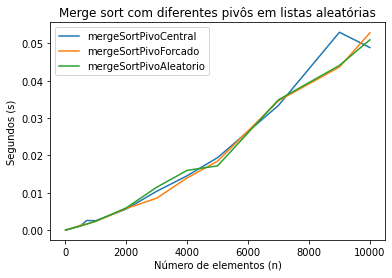

In [65]:
def mergeSortPivoCentral(lista):
    return quickSort(lista)

def mergeSortPivoForcado(lista):
    return quickSort(lista, pivo_forcado=True)

def mergeSortPivoAleatorio(lista):
    return quickSort(lista, pivo_aleatorio=True)

medeTempoEPlota(
    [mergeSortPivoCentral,
     mergeSortPivoForcado,
     mergeSortPivoAleatorio,
     ],
    listas_aleatorias,
    "Merge sort com diferentes pivôs em listas aleatórias"
)

No caso abaixo, veremos o efeito das diferentes estratégias de seleção de pivô para uma lista de números já ordenada em ordem invertida.

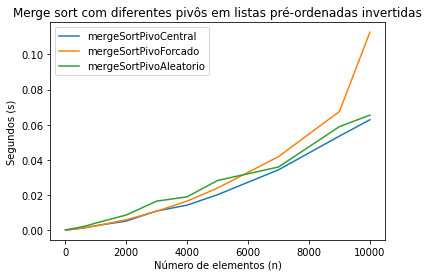

In [66]:
medeTempoEPlota(
    [mergeSortPivoCentral,
     mergeSortPivoForcado,
     mergeSortPivoAleatorio,
     ],
    listas_invertidas,
    "Merge sort com diferentes pivôs em listas pré-ordenadas invertidas"
)

No caso abaixo, veremos o efeito das diferentes estratégias de seleção de pivô para uma lista de números já ordenados.

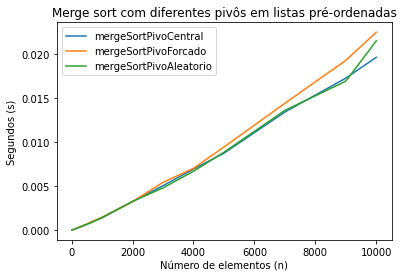

In [67]:
medeTempoEPlota(
    [mergeSortPivoCentral,
     mergeSortPivoForcado,
     mergeSortPivoAleatorio,
     ],
    listas_ordenadas,
    "Merge sort com diferentes pivôs em listas pré-ordenadas"
)

Finalmente, podemos comparar o desempenho dos diferentes algoritmos de ordenação para os cenários já mencionados.

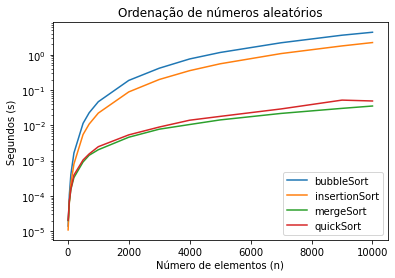

In [68]:
medeTempoEPlota(
    [bubbleSort,
     insertionSort,
     mergeSort,
     quickSort
     ],
    listas_aleatorias,
    "Ordenação de números aleatórios",
    log=True
)

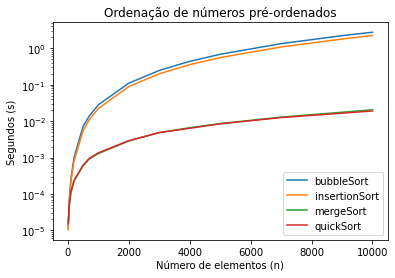

In [69]:
medeTempoEPlota(
    [bubbleSort,
     insertionSort,
     mergeSort,
     quickSort
     ],
    listas_ordenadas,
    "Ordenação de números pré-ordenados",
    log=True
)

Observe que neste caso, o desempenho do quick sort é inferior ao do merge sort para um grande conjunto de números a serem ordenados.

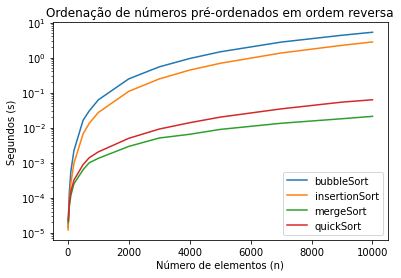

In [70]:
medeTempoEPlota(
    [bubbleSort,
     insertionSort,
     mergeSort,
     quickSort
     ],
    listas_invertidas,
    "Ordenação de números pré-ordenados em ordem reversa",
    log=True
)

Além destes, também existem algoritmos de ordenação em tempo linear que não seja o `count sort`.

O mais comumente utilizado se chama radix sort.

### Radix sort

O radix sort ordenada um conjunto de dados globalmente por uma série de ordenações locais, partindo dos dados menos significativos para os mais significativos.

Por exemplo, quando trabalhamos com números, estes números têm uma quantidade de dígitos.

Partimos ordenando os números pelos dígitos menos significativos e em direção aos mais significativos.

Observemos o radix sort num exemplo.

In [71]:
numeros_para_radix_sort = [132,321,213]

def imprime_resultado_radix(iteracao: int, resultado: list):
    print(f"Iteração: {iteracao}")
    print("\n".join(map(str, resultado)))
    print("=====================")

imprime_resultado_radix(iteracao=-1, resultado=numeros_para_radix_sort)

Iteração: -1
132
321
213


Temos os três números acima, completamente fora de ordem.

Para ordená-los, começaremos do dígito menos significativo.

Por usarmos máquinas binárias, vamos utilizar base binária para evitar divisões e multiplicações.

In [72]:
def imprime_resultado_radix_binario(iteracao: int, resultado: list):
    print(f"Iteração: {iteracao}")
    print("\n".join(map(lambda x: f"{x:10b}", resultado)))
    print("=====================")

imprime_resultado_radix_binario(-1, numeros_para_radix_sort)

Iteração: -1
  10000100
 101000001
  11010101


Sabendo os valores, agora faremos a técnica de deslocamento e mascaramento (shift-and-mask).

Cada deslocamento de um bit para a direita, corresponde a divisão por 2.

```
132 = 10000100
66 = 1000010
33 = 100001
16 = 10000
8 = 1000
4 = 100
2 = 10
1 = 1
```

Podemos usar o mascaramento binário `& 0x01` para selecionar apenas o bit menos significativo.

```
(132 >> 0) & 0x01 = 132 & 0x01 = 1000010|0 & 0x01 = 0
(132 >> 1) & 0x01 = 66 & 0x01 = 100001|0 & 0x01 = 0
(132 >> 2) & 0x01 = 33 & 0x01 = 10000|1 & 0x01 = 1
(132 >> 3) & 0x01 = 16 & 0x01 = 1000|0 & 0x01 = 0
(132 >> 4) & 0x01 = 8 & 0x01 = 100|0 & 0x01 = 0
(132 >> 5) & 0x01 = 4 & 0x01 = 10|0 & 0x01 = 0
(132 >> 6) & 0x01 = 2 & 0x01 = 1|0 & 0x01 = 0
(132 >> 7) & 0x01 = 1 & 0x01 = |1 & 0x01 = 1
```

Com isto, ordenaremos com base apenas do bit menos significativo para cada iteração.
Já que só temos duas alternativas para cada bit, podemos implementar a ordenação pelo bit
através de um vetor e swaps, ou utilizando um deque.

In [73]:
def radix_iteracao_binario(iteracao: int = 0, entrada: list = ()):
    saida = list(sorted(entrada, key=lambda x: (x >> iteracao) &  0x01))
    return iteracao, saida

imprime_resultado_radix_binario(-1, numeros_para_radix_sort)
imprime_resultado_radix_binario(*radix_iteracao_binario(0, numeros_para_radix_sort))

Iteração: -1
  10000100
 101000001
  11010101
Iteração: 0
  10000100
 101000001
  11010101


Veja que a primeira iteração não fez nenhuma diferença, pois os bits menos significativos já estavam ordenados.

Na segunda iteração, também não devemos ver nenhuma diferença.

In [74]:
imprime_resultado_radix_binario(-1, numeros_para_radix_sort)
imprime_resultado_radix_binario(*radix_iteracao_binario(1, numeros_para_radix_sort))

Iteração: -1
  10000100
 101000001
  11010101
Iteração: 1
  10000100
 101000001
  11010101


Na terceira iteração, porém, haverá mudança da ordem.

In [75]:
imprime_resultado_radix_binario(-1, numeros_para_radix_sort)
imprime_resultado_radix_binario(*radix_iteracao_binario(2, numeros_para_radix_sort))

Iteração: -1
  10000100
 101000001
  11010101
Iteração: 2
 101000001
  10000100
  11010101


Em base decimal, teríamos

In [76]:
imprime_resultado_radix(-1, numeros_para_radix_sort)
imprime_resultado_radix(*radix_iteracao_binario(2, numeros_para_radix_sort))

Iteração: -1
132
321
213
Iteração: 2
321
132
213


Podemos verificar acima que todos os números estão localmente ordenados quando olhamos o dígito menos significativo.

Precisamos repetir o processo até alcançar o dígito mais significativo, onde teremos todos os números globalmente ordenados.

É muito comum trabalharmos com números de 32 ou 64 dígitos binários (bits), por conta das arquiteturas x86 (Intel) e x86-64 (AMD).

O radix completo funciona iterando uma vez por bit, como mostrado abaixo

In [77]:
def radixSort(entrada, imprime_passos=False):
    temp = entrada
    if imprime_passos:
        imprime_resultado_radix(-1, temp)
    # poderiam ser 32, 64 para casos genéricos em arquiteturas x86-64 ou ARM
    tamanho_maximo_em_bits = len(f"{max(entrada):b}")
    for bit in range(tamanho_maximo_em_bits):
        it, temp = radix_iteracao_binario(bit, temp)
        if imprime_passos:
            imprime_resultado_radix(bit, temp)
    return temp

radixSort(numeros_para_radix_sort, imprime_passos=True)

Iteração: -1
132
321
213
Iteração: 0
132
321
213
Iteração: 1
132
321
213
Iteração: 2
321
132
213
Iteração: 3
321
132
213
Iteração: 4
321
132
213
Iteração: 5
321
132
213
Iteração: 6
132
321
213
Iteração: 7
321
132
213
Iteração: 8
132
213
321


[132, 213, 321]

O radix-sort é extremamente poderoso, e pode ser utilizado para resolver diversos problemas.

Por exemplo, podemos organizar polígonos por suas propriedades.

In [78]:
poligonos = {
    "quadrado": {
        "lados": 4,
        "equilatero": True,
        "angulo_retangulo": True
    },
    "retangulo": {
        "lados": 4,
        "equilatero": False,
        "angulo_retangulo": True
    },
    "triangulo_equilatero": {
       "lados": 3,
       "equilatero": True,
       "angulo_retangulo": False
    },
    "triangulo_retangulo": {
        "lados": 3,
        "equilatero": False,
        "angulo_retangulo": True
    }
}

def imprime_ordem_poligonos(poligonos: list):
    print(list(map(lambda x: x[0], poligonos)))

ordem_original = list(poligonos.items())

imprime_ordem_poligonos(ordem_original)

['quadrado', 'retangulo', 'triangulo_equilatero', 'triangulo_retangulo']


Queremos ordenar estes polígonos com a seguinte ordem: angulo retângulo, número de lados, equilátero.
Podemos usar a mesma idéia do radix-sort, ordenando primeiro a propriedade de ordem menos significativa, ou seja, equilátero.

In [79]:
ordenados_por_equilatero = list(sorted(ordem_original, key=lambda x: x[1]["equilatero"]))
imprime_ordem_poligonos(ordenados_por_equilatero)

['retangulo', 'triangulo_retangulo', 'quadrado', 'triangulo_equilatero']


Como podemos ver, os polígonos não equiláteros estão juntos no começo da lista, enquanto os equiláteros estão ao final.

A segunda propriedade de ordem menos significativa é o número de lados. Esperamos que os triângulos apareçam primeiro e os retângulos ao final.

In [80]:
ordenados_por_lados_equilatero = list(sorted(ordenados_por_equilatero, key=lambda x: x[1]["lados"]))
imprime_ordem_poligonos(ordenados_por_lados_equilatero)

['triangulo_retangulo', 'triangulo_equilatero', 'retangulo', 'quadrado']


De fato, isto aconteceu. Partâmos estão para a próxima propriedade, sobre a existência de ângulo retângulo.

Neste caso, esperamos o triângulo equilátero, seguido dos polígonos com ângulos retângulos: triângulo retângulo, seguido do retângulo e quadrado.

In [81]:
ordenados_por_retangulo_lados_equilatero = list(sorted(ordenados_por_lados_equilatero, key=lambda x: x[1]["angulo_retangulo"]))
imprime_ordem_poligonos(ordenados_por_retangulo_lados_equilatero)

['triangulo_equilatero', 'triangulo_retangulo', 'retangulo', 'quadrado']
